In [1]:
from astropy.io import fits as fits
from matplotlib import pyplot as plt
import matplotlib
import numpy as np


In [2]:
noiseless_img_hdu = 0
psf_hdu = 1
targets_hdu = 2
win_hdu=0

for i in range(21):
    if i<10:
        filename='/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-0{0}-multihdu.fits'.format(i)
    else:
         filename='/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-{0}-multihdu.fits'.format(i)
    win_filename="/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/window/Gaussian_window_claire_{0}.fits".format(i)
    im0=fits.getdata(filename,noiseless_img_hdu)
    psf=fits.getdata(filename,psf_hdu)
    window=fits.getdata(win_filename,win_hdu)
    hdu_win=fits.ImageHDU(data=window)
    hdu_psf=fits.ImageHDU(data=psf)
    hdu_im=fits.PrimaryHDU(im0)
    hdul = fits.HDUList([hdu_im,hdu_psf,hdu_win])
    if i<10:
        mosaic_name='image-shfl-0{0}-multihdu_newtar.fits'.format(i)
    else:
        mosaic_name='image-shfl-{0}-multihdu_newtar.fits'.format(i)
    hdul.writeto('/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/'+'new_targets/'+mosaic_name,overwrite=True)

In [20]:
tar=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-20-multihdu.fits",2)


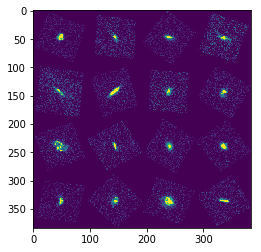

<Figure size 432x288 with 0 Axes>

In [21]:
plt.imshow(tar[0:384,0:384],vmin=0,vmax=0.2)
plt.figure()
hdu_tar=fits.PrimaryHDU(tar)
hdul = fits.HDUList([hdu_tar])
mosaic_name='image-shfl-20-multihdu_only_target.fits'
hdul.writeto('/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/'+mosaic_name,overwrite=True)

In [ ]:
im0=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-03-multihdu.fits",noiseless_img_hdu)
psf=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/new_targets/image-shfl-03-multihdu_newtar.fits",psf_hdu)
target=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/new_targets/image-shfl-03-multihdu_newtar.fits",targets_hdu)
im=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/new_targets/image-shfl-03-multihdu_newtar.fits",targets_hdu)

plt.imshow(im0[0:386,0:386],vmin=0,vmax=0.5)
plt.figure()
plt.imshow(im[0:386,0:386],vmin=0,vmax=0.5)
plt.figure()
plt.imshow(psf[0:386,0:386],vmin=0,vmax=0.5)
plt.figure()
plt.imshow(target[0:386,0:386],vmin=0,vmax=0.5)